In [1]:

import pandas as pd



In [2]:
p_day=7

In [3]:
df=pd.read_csv("Reliance.csv")
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
len(df)

1234

In [5]:
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1229,2021-11-10,2516.699951,2558.000000,2503.649902,2549.899902,2549.899902,4731975
1230,2021-11-11,2540.050049,2570.500000,2535.550049,2554.550049,2554.550049,4948422
1231,2021-11-12,2562.899902,2598.750000,2557.000000,2593.100098,2593.100098,4020744
1232,2021-11-15,2600.000000,2602.199951,2570.000000,2577.800049,2577.800049,2216708
1233,2021-11-16,2572.050049,2575.000000,2495.000000,2517.899902,2517.899902,5230607


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1.dropna()

0        488.643158
1        484.284454
2        489.113678
3        491.094910
4        496.023193
           ...     
1229    2549.899902
1230    2554.550049
1231    2593.100098
1232    2577.800049
1233    2517.899902
Name: Close, Length: 1234, dtype: float64

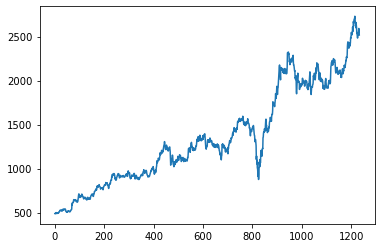

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np

In [11]:
df1

0        488.643158
1        484.284454
2        489.113678
3        491.094910
4        496.023193
           ...     
1229    2549.899902
1230    2554.550049
1231    2593.100098
1232    2577.800049
1233    2517.899902
Name: Close, Length: 1234, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.0019393 ]
 [0.        ]
 [0.00214865]
 ...
 [0.93826654]
 [0.93145915]
 [0.90480803]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(802, 432)

In [16]:
train_data

array([[0.0019393 ],
       [0.        ],
       [0.00214865],
       [0.00303015],
       [0.00522287],
       [0.0068867 ],
       [0.0021156 ],
       [0.00351497],
       [0.00196134],
       [0.00439647],
       [0.0027106 ],
       [0.00440748],
       [0.00374636],
       [0.00354803],
       [0.00604927],
       [0.00471601],
       [0.00932183],
       [0.01128315],
       [0.01089751],
       [0.0136742 ],
       [0.01801557],
       [0.01657214],
       [0.0174977 ],
       [0.01868771],
       [0.01766298],
       [0.01884199],
       [0.01666029],
       [0.01753075],
       [0.01536008],
       [0.01916153],
       [0.01585593],
       [0.01932681],
       [0.02306216],
       [0.02365715],
       [0.02460476],
       [0.01970145],
       [0.02196027],
       [0.02142035],
       [0.02202639],
       [0.02470393],
       [0.02386652],
       [0.02326048],
       [0.02482513],
       [0.02170685],
       [0.01399375],
       [0.0120765 ],
       [0.01232994],
       [0.010

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = p_day
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(794, 7)
(794,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(424, 7)
(424,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(p_day,1)))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=10,verbose=2)

Epoch 1/50
80/80 - 7s - loss: 0.0123 - val_loss: 0.0026
Epoch 2/50
80/80 - 1s - loss: 0.0030 - val_loss: 0.0018
Epoch 3/50
80/80 - 1s - loss: 0.0026 - val_loss: 0.0083
Epoch 4/50
80/80 - 1s - loss: 0.0021 - val_loss: 0.0057
Epoch 5/50
80/80 - 1s - loss: 0.0018 - val_loss: 0.0053
Epoch 6/50
80/80 - 1s - loss: 0.0020 - val_loss: 0.0098
Epoch 7/50
80/80 - 1s - loss: 0.0019 - val_loss: 0.0052
Epoch 8/50
80/80 - 1s - loss: 0.0017 - val_loss: 0.0142
Epoch 9/50
80/80 - 1s - loss: 0.0016 - val_loss: 0.0078
Epoch 10/50
80/80 - 1s - loss: 0.0016 - val_loss: 0.0056
Epoch 11/50
80/80 - 1s - loss: 0.0014 - val_loss: 0.0046
Epoch 12/50
80/80 - 1s - loss: 0.0015 - val_loss: 0.0078
Epoch 13/50


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=p_day
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,color="red")
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[len(test_data)-p_day-1:].reshape(1,-1)
x_input.shape


In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
len(temp_input)

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=p_day
futureDays=70
i=0

while(i<futureDays):
    
    if(len(temp_input)>p_day):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,futureDays+1)
day_pred=np.arange(p_day+1,p_day+1+futureDays)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-futureDays:]),color="red")
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)


plt.plot(df3[len(df1)-365:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
df4 = pd.DataFrame(df3,columns =['Close'])
df4


In [ ]:
plt.plot(df4["Close"][5:])
plt.show()

In [ ]:

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
r2 = r2_score(ytest, test_predict)